In [26]:
#import the libraries

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from streamlit import dataframe
import seaborn as sns
engine = create_engine('sqlite:///netflix_users.db',echo=False)

In [2]:
df = pd.read_csv('netflix_userbase.csv')
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [11]:
df.isnull().sum()
df.columns = df.columns.str.replace(' ', '')

#Transfering the dataframe df into netflix_users.rb

In [12]:
df.to_sql('netflix_userbase', con=engine, if_exists='replace')

2500

In [13]:
query_1 = "SELECT * FROM netflix_userbase"

pd.read_sql(query_1, con=engine)


,index,UserID,SubscriptionType,MonthlyRevenue,JoinDate,LastPaymentDate,Country,Age,Gender,Device,PlanDuration
0,0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...,...
2495,2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


*What is the count of Users per Subscription Type?*

In [22]:
query_2 = """ SELECT SubscriptionType,COUNT(*) AS sub_count FROM  netflix_userbase 
                GROUP BY SubscriptionType """
subscription_df = pd.read_sql(query_2, con=engine)

In [23]:
subscription_df

,SubscriptionType,sub_count
0,Basic,999
1,Premium,733
2,Standard,768


Text(0.5, 1.0, 'Netflix Subscription Type')

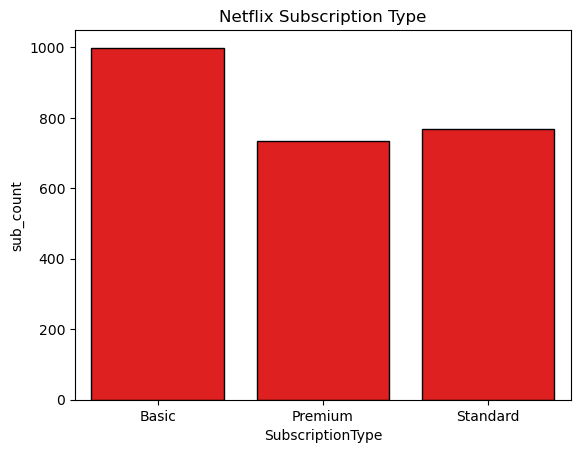

In [33]:
sns.barplot(x='SubscriptionType', y='sub_count', data=subscription_df,color='red',edgecolor='black')
plt.title("Netflix Subscription Type")

*What is the count of users per device type*

In [35]:
query_3 = """SELECT Device,COUNT(*) AS device_count FROM  netflix_userbase 
            GROUP BY Device """

device_df = pd.read_sql(query_3, con=engine)
device_df.head()

,Device,device_count
0,Laptop,636
1,Smart TV,610
2,Smartphone,621
3,Tablet,633


Text(0.5, 1.0, 'Netflix Device Count')

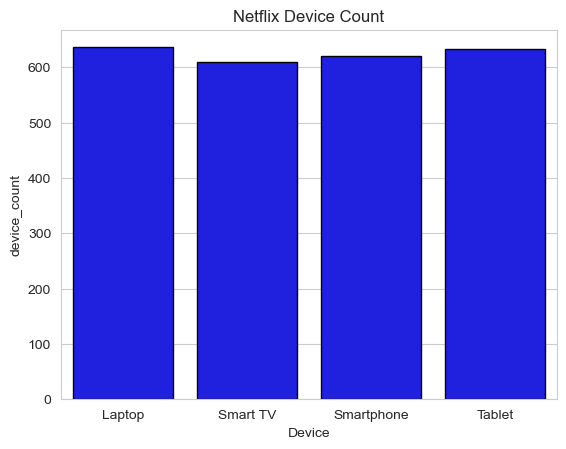

In [37]:
sns.barplot(x='Device', y='device_count', data=device_df,color='blue',edgecolor='black')
plt.title("Netflix Device Count")